In [ ]:
from google.colab import files
info = files.upload()

Saving bike_sales_100k.csv to bike_sales_100k.csv


In [ ]:
import pandas as pd
df = pd.read_csv('bike_sales_100k.csv')

In [ ]:
df.head(10)

Sale_ID        Date  Customer_ID     Bike_Model    Price  Quantity  \
0        1  11-07-2022         9390        Cruiser   318.32         1   
1        2  03-05-2024         3374    Hybrid Bike  3093.47         4   
2        3  01-09-2022         2689   Folding Bike  4247.99         3   
3        4  28-09-2022         3797  Mountain Bike  1722.01         3   
4        5  05-01-2021         1633            BMX  3941.44         3   
5        6  06-09-2021         9663  Mountain Bike  1778.12         5   
6        7  08-06-2020         6049    Hybrid Bike  1513.60         4   
7        8  22-08-2021         5784      Road Bike  3825.94         1   
8        9  04-10-2020         9649      Road Bike   614.94         3   
9       10  22-03-2023         3977  Electric Bike  2707.40         5   

  Store_Location  Salesperson_ID Payment_Method  Customer_Age Customer_Gender  
0   Philadelphia             589      Apple Pay            70          Female  
1        Chicago             390      Apple Pay            37            Male  
2    San Antonio             338         PayPal            59          Female  
3    San Antonio             352      Apple Pay            19            Male  
4   Philadelphia             580         PayPal            67          Female  
5        Chicago             829     Google Pay            42            Male  
6   Philadelphia             916     Google Pay            20            Male  
7   Philadelphia             291     Debit Card            57            Male  
8    San Antonio             906     Debit Card            62            Male  
9    Los Angeles             562         PayPal            65            Male

In [ ]:
df.shape

(100000, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Sale_ID          100000 non-null  int64  
 1   Date             100000 non-null  object 
 2   Customer_ID      100000 non-null  int64  
 3   Bike_Model       100000 non-null  object 
 4   Price            100000 non-null  float64
 5   Quantity         100000 non-null  int64  
 6   Store_Location   100000 non-null  object 
 7   Salesperson_ID   100000 non-null  int64  
 8   Payment_Method   100000 non-null  object 
 9   Customer_Age     100000 non-null  int64  
 10  Customer_Gender  100000 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 8.4+ MB


In [ ]:
df.isna().sum()

Sale_ID            0
Date               0
Customer_ID        0
Bike_Model         0
Price              0
Quantity           0
Store_Location     0
Salesperson_ID     0
Payment_Method     0
Customer_Age       0
Customer_Gender    0
dtype: int64

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

Sale_ID    Customer_ID          Price       Quantity  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean    50000.500000    5495.450720    2598.182340       2.997110   
std     28867.657797    2598.873948    1384.943133       1.414235   
min         1.000000    1000.000000     200.010000       1.000000   
25%     25000.750000    3249.000000    1399.787500       2.000000   
50%     50000.500000    5491.000000    2598.575000       3.000000   
75%     75000.250000    7738.000000    3795.982500       4.000000   
max    100000.000000    9999.000000    4999.810000       5.000000   

       Salesperson_ID   Customer_Age  
count   100000.000000  100000.000000  
mean       549.906300      44.043410  
std        259.679221      15.313761  
min        100.000000      18.000000  
25%        324.000000      31.000000  
50%        550.000000      44.000000  
75%        775.000000      57.000000  
max        999.000000      70.000000

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

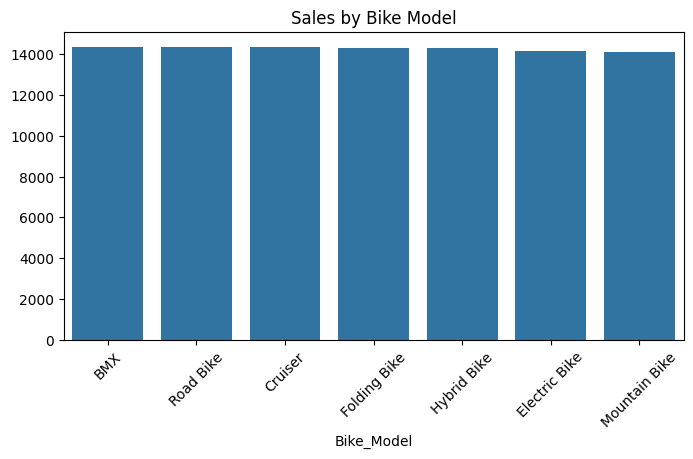

In [ ]:
# Sales by Bike Model
bike_model_counts = df['Bike_Model'].value_counts()
plt.figure(figsize=(8,4))
sns.barplot(x=bike_model_counts.index, y=bike_model_counts.values)
plt.title('Sales by Bike Model')
plt.xticks(rotation=45)
plt.show()

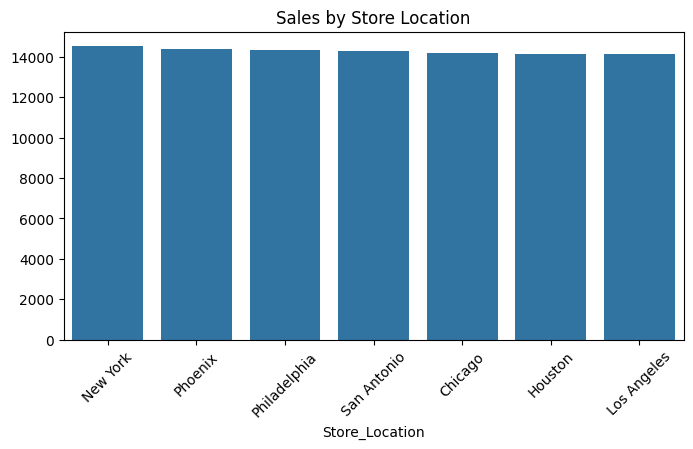

In [ ]:
# Sales by Store Location
store_counts = df['Store_Location'].value_counts()
plt.figure(figsize=(8,4))
sns.barplot(x=store_counts.index, y=store_counts.values)
plt.title('Sales by Store Location')
plt.xticks(rotation=45)
plt.show()

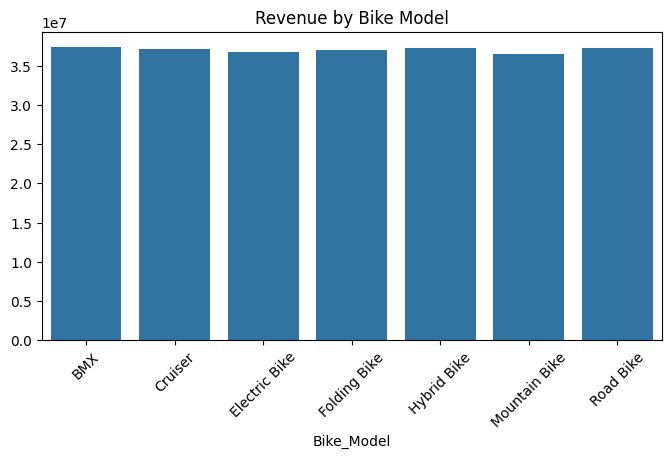

In [ ]:
# Revenue by Bike Model
revenue_by_model = df.groupby('Bike_Model')['Price'].sum()
plt.figure(figsize=(8,4))
sns.barplot(x=revenue_by_model.index, y=revenue_by_model.values)
plt.title('Revenue by Bike Model')
plt.xticks(rotation=45)
plt.show()

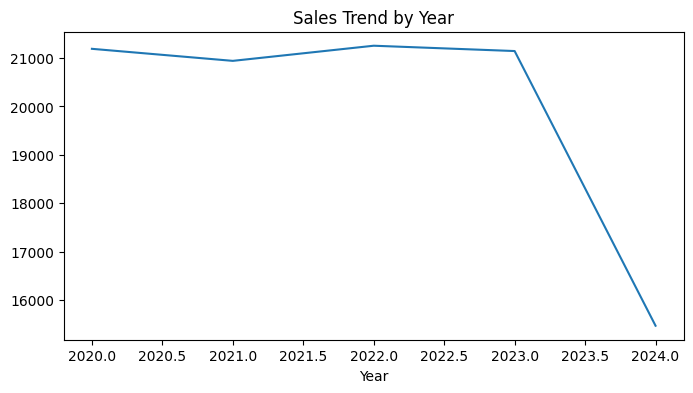

In [ ]:
# Sales by Year
df['Year'] = df['Date'].dt.year
sales_by_year = df['Year'].value_counts().sort_index()
plt.figure(figsize=(8,4))
sns.lineplot(x=sales_by_year.index, y=sales_by_year.values)
plt.title('Sales Trend by Year')
plt.show()

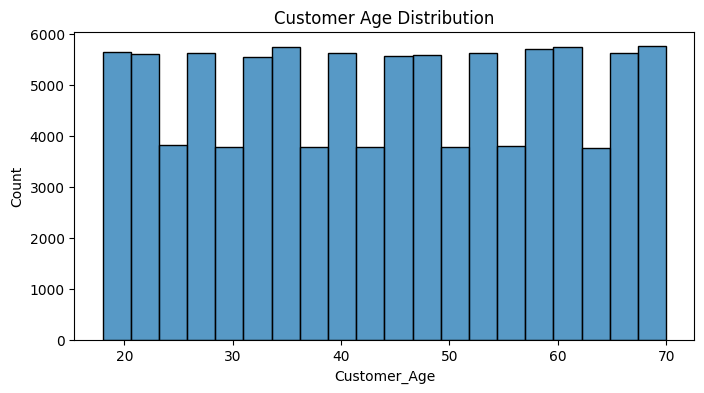

In [ ]:
# Age Distribution
plt.figure(figsize=(8,4))
sns.histplot(df['Customer_Age'], bins=20)
plt.title('Customer Age Distribution')
plt.show()

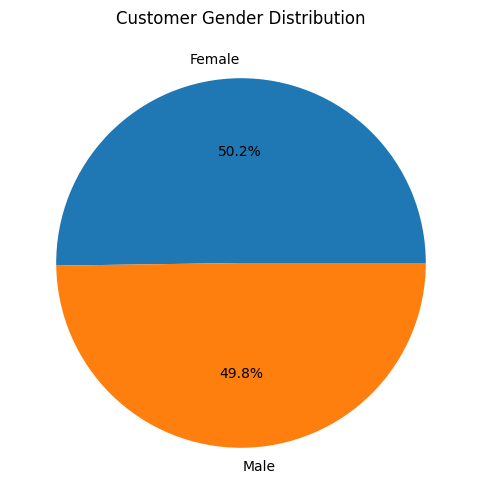

In [ ]:
# Gender Distribution
gender_counts = df['Customer_Gender'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Customer Gender Distribution')
plt.show()

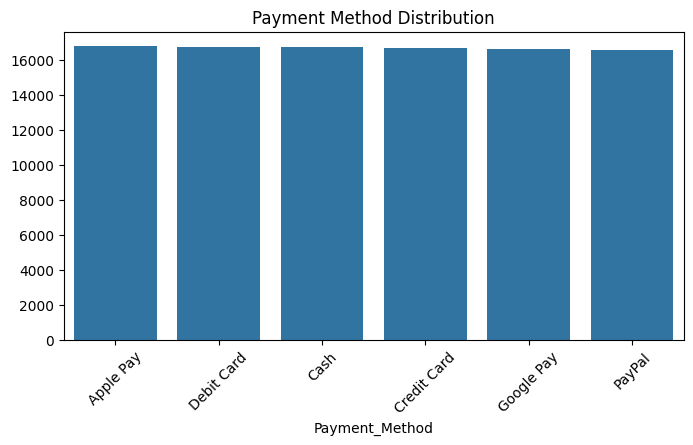

In [ ]:
# Payment Method Distribution
payment_counts = df['Payment_Method'].value_counts()
plt.figure(figsize=(8,4))
sns.barplot(x=payment_counts.index, y=payment_counts.values)
plt.title('Payment Method Distribution')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Average Price of Bike Models')

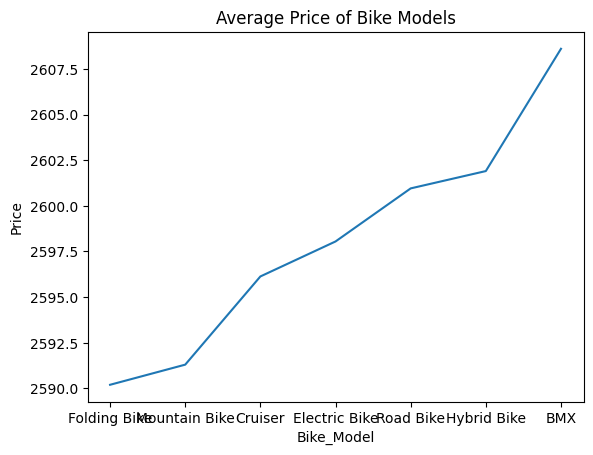

In [ ]:
# GROUP BY VARIABLES
df1=df.groupby(['Bike_Model']).agg({'Price':'mean'}).reset_index().sort_values(by='Price')
sns.lineplot(x="Bike_Model", y="Price", data=df1)
plt.title("Average Price of Bike Models")

<Axes: title={'center': 'Average Price by Store Location'}, xlabel='Store_Location', ylabel='Price'>

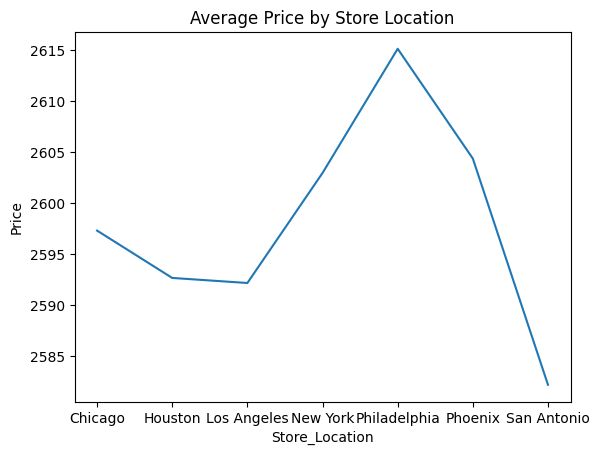

In [ ]:
# Grouping by price and store location
df2=df.groupby(['Store_Location']).agg({'Price':'mean'}).reset_index()
plt.title("Average Price by Store Location")
sns.lineplot(x="Store_Location", y="Price", data=df2)

In [ ]:
df['Total_Revenue'] = df['Price'] * df['Quantity']
df['Month'] = df['Date'].dt.month
df['Day_of_Week'] = df['Date'].dt.dayofweek

In [ ]:
df.head(10)

Sale_ID       Date  Customer_ID     Bike_Model    Price  Quantity  \
0        1 2022-07-11         9390        Cruiser   318.32         1   
1        2 2024-05-03         3374    Hybrid Bike  3093.47         4   
2        3 2022-09-01         2689   Folding Bike  4247.99         3   
3        4 2022-09-28         3797  Mountain Bike  1722.01         3   
4        5 2021-01-05         1633            BMX  3941.44         3   
5        6 2021-09-06         9663  Mountain Bike  1778.12         5   
6        7 2020-06-08         6049    Hybrid Bike  1513.60         4   
7        8 2021-08-22         5784      Road Bike  3825.94         1   
8        9 2020-10-04         9649      Road Bike   614.94         3   
9       10 2023-03-22         3977  Electric Bike  2707.40         5   

  Store_Location  Salesperson_ID Payment_Method  Customer_Age Customer_Gender  \
0   Philadelphia             589      Apple Pay            70          Female   
1        Chicago             390      Apple Pay            37            Male   
2    San Antonio             338         PayPal            59          Female   
3    San Antonio             352      Apple Pay            19            Male   
4   Philadelphia             580         PayPal            67          Female   
5        Chicago             829     Google Pay            42            Male   
6   Philadelphia             916     Google Pay            20            Male   
7   Philadelphia             291     Debit Card            57            Male   
8    San Antonio             906     Debit Card            62            Male   
9    Los Angeles             562         PayPal            65            Male   

   Year  Total_Revenue  Month  Day_of_Week  
0  2022         318.32      7            0  
1  2024       12373.88      5            4  
2  2022       12743.97      9            3  
3  2022        5166.03      9            2  
4  2021       11824.32      1            1  
5  2021        8890.60      9            0  
6  2020        6054.40      6            0  
7  2021        3825.94      8            6  
8  2020        1844.82     10            6  
9  2023       13537.00      3            2

In [ ]:
# from google.colab import files
# Save the DataFrame to a CSV file
# df.to_csv('df.csv', index=False)
# files.download('df.csv')  # Replace with your actual filename

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Task
Perform a linear regression on the dataframe `df` to predict future sales.

## Prepare the data

### Subtask:
Extract relevant features for the linear regression model. This may involve creating new features from existing columns in the `df` DataFrame.


**Reasoning**:
Create 'Total_Revenue', 'Month', and 'Day_of_Week' columns, and then perform one-hot encoding on the specified categorical features. Finally, create the feature set X and target variable y DataFrames.



In [ ]:
df['Total_Revenue'] = df['Price'] * df['Quantity']
df['Month'] = df['Date'].dt.month
df['Day_of_Week'] = df['Date'].dt.dayofweek

categorical_features = ['Store_Location', 'Bike_Model', 'Payment_Method', 'Customer_Gender']
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

features = ['Month', 'Day_of_Week', 'Customer_Age'] + [col for col in df_encoded.columns if col.startswith(('Store_Location_', 'Bike_Model_', 'Payment_Method_', 'Customer_Gender_'))]
X = df_encoded[features]
y = df_encoded['Total_Revenue']

## Split the data

### Subtask:
Divide the dataset into training and testing sets.


**Reasoning**:
Split the data into training and testing sets for the linear regression model.



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Build and train the model

### Subtask:
Create and train a linear regression model using the training data.


**Reasoning**:
Import the LinearRegression class and instantiate and train the model.



In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Evaluate the model

### Subtask:
Assess the performance of the trained model using the testing data.


**Reasoning**:
Import evaluation metrics and make predictions on the test set.



In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

**Reasoning**:
Calculate and print the evaluation metrics.



In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

Mean Absolute Error (MAE): 4902.19643424347
Mean Squared Error (MSE): 35486617.78372091
R-squared (R2): -0.0003567558530888082


## Make predictions

### Subtask:
Use the trained model to predict future sales.


**Reasoning**:
Use the trained linear regression model to predict future sales on the test set features.



In [ ]:
y_pred = model.predict(X_test)

## Summary:

### Data Analysis Key Findings
* The linear regression model was trained on a dataset that included engineered features such as 'Total_Revenue', 'Month', and 'Day_of_Week', as well as one-hot encoded categorical variables.
* The model's performance on the test data was evaluated, yielding the following metrics:
    * Mean Absolute Error (MAE): \$4902.20
    * Mean Squared Error (MSE): \$35,486,617.78
    * R-squared (R2): -0.00036
* The negative R-squared value indicates that the linear regression model is not a good fit for the data and performs worse than a simple model that always predicts the average of the target variable.

### Insights or Next Steps
* The poor performance of the linear regression model suggests that the relationship between the selected features and total revenue is likely not linear.
* Consider exploring more complex models, such as tree-based models (e.g., Random Forest, Gradient Boosting) or polynomial regression, which can capture non-linear relationships in the data.
